Importando clases de Qiskit: Operator, Statevector; para usar los metodos "tensor" y "evolve"

In [5]:
from qiskit.quantum_info import Operator
from numpy import matmul, dot

Probando con vectores de estado pre-definidos

In [6]:
S = Operator.from_label("S")
T = Operator.from_label("T")
H = Operator.from_label("H")

print("Operador Hadamard (H)"); display(H.draw("latex"))
print("Operador Phase (S)"); display(S.draw("latex"))
print("Operador Pi/8 (T)"); display(T.draw("latex"))
print("Producto Tensorial: 'H^S^H^T"); display(H.tensor(S).tensor(H).tensor(T).draw("latex"))
print("Producto Matricial: 'H^S^H^T"); display(T.dot(H).dot(S).dot(H).draw("latex"))

Operador Hadamard (H)


<IPython.core.display.Latex object>

Operador Phase (S)


<IPython.core.display.Latex object>

Operador Pi/8 (T)


<IPython.core.display.Latex object>

Producto Tensorial: 'H^S^H^T


<IPython.core.display.Latex object>

Producto Matricial: 'H^S^H^T


<IPython.core.display.Latex object>

Importamos nuevas clases de Qiskit, asi como un simulador para circuitos que debera instalarse antes con la instrucción:
"pip install qiskit-aer"

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Ejemplo de un circuito cuantico con Operadores: Hadamard, Phase, Pi/4; con el simulador "qiskit_aer"

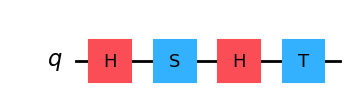

In [8]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw(output="mpl"))

De forma predeterminada en Qiskit los nombre de los qubits son "q" y si hubiera más de uno tendrian un subindice para diferenciarlos. Pero si se desea nombrarlos y/o agruparlos con un único nombre se utiliza la clase "QuantumRegister", aquí un ejemplo para un solo qubit

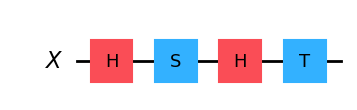

In [9]:
X = QuantumRegister(1, "X")
circuitX = QuantumCircuit(X)
circuitX.h(X)
circuitX.s(X)
circuitX.h(X)
circuitX.t(X)

display(circuitX.draw(output="mpl"))

Ejemplo de un circuito con 2 cubits

Circuito Quantum con 02 qubits


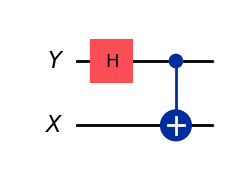

Salida despues del Operador


<IPython.core.display.Latex object>

In [10]:
Y = QuantumRegister(1, "Y")
circuitXY = QuantumCircuit(Y, X)
circuitXY.h(Y)
circuitXY.cx(Y, X)

print("Circuito Quantum con 02 qubits"); display(circuitXY.draw(output="mpl"))
print("Salida despues del Operador"); display(Operator.from_circuit(circuitXY).draw("latex"))

Circuito con 2 qubits y 2 bits clasicos, una puerta ó operador Hadamard, un Not Controlado y sus correspondientes medidores para los qubits

Circuito de 2 Qubits y 2 bits clasicos


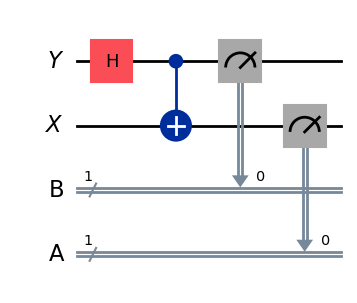

In [11]:
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuitYXBA = QuantumCircuit(Y, X, B, A)
circuitYXBA.h(Y)
circuitYXBA.cx(Y, X)
circuitYXBA.measure(Y, B)
circuitYXBA.measure(X, A)

print("Circuito de 2 Qubits y 2 bits clasicos"); display(circuitYXBA.draw(output="mpl"))

Simulando este último circuito con la libreria "Aer" de Qiskit

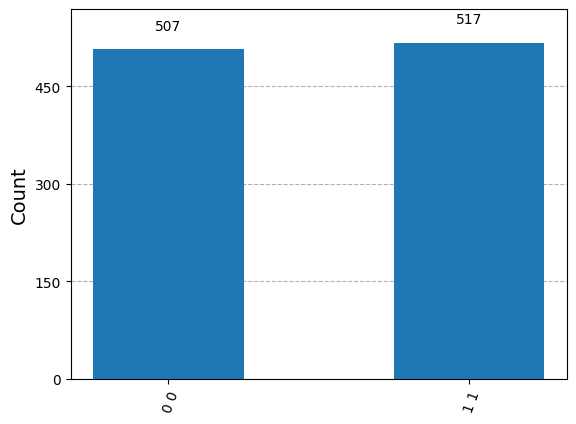

In [12]:
result = AerSimulator().run(circuitYXBA).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

Productos Internos

In [50]:
import numpy as np

a = Operator([[1], [5], [1], [3]])
b = Operator.transpose(a)
c = Operator.dot(b, a)

print("Sea el vector: BRA 'a':"); display(a.draw("latex"))
print("Sea el vector: KET 'a':"); display(b.draw("latex"))
print("Por tanto el Producto Interno de <a|a> es: "); display(c.draw(output="latex"))
print("Además ajustanto con la raíz cuadrada, podemos tener su Norma Euclidiana: ",np.real(np.sqrt(c)[0,0]))

Sea el vector: BRA 'a':


<IPython.core.display.Latex object>

Sea el vector: KET 'a':


<IPython.core.display.Latex object>

Por tanto el Producto Interno de <a|a> es: 


<IPython.core.display.Latex object>

Además ajustanto con la raíz cuadrada, podemos tener su Norma Euclidiana:  6.0
